In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load the dataset from the CSV file
file_path = 'Incendies.csv'
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29732 entries, 0 to 29731
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Année                                       29732 non-null  int64  
 1   Numéro                                      29732 non-null  int64  
 2   Département                                 29732 non-null  object 
 3   Code INSEE                                  29732 non-null  object 
 4   Nom de la commune                           29705 non-null  object 
 5   Date de première alerte                     29732 non-null  object 
 6   Surface parcourue (m2)                      29732 non-null  int64  
 7   Surface forêt (m2)                          21005 non-null  float64
 8   Surface maquis garrigues (m2)               8809 non-null   float64
 9   Autres surfaces naturelles hors forêt (m2)  14536 non-null  float64
 10  Surfaces a

In [56]:
df['Date de première alerte'] = pd.to_datetime(df['Date de première alerte'], errors='coerce')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29732 entries, 0 to 29731
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Année                                       29732 non-null  int64         
 1   Numéro                                      29732 non-null  int64         
 2   Département                                 29732 non-null  object        
 3   Code INSEE                                  29732 non-null  object        
 4   Nom de la commune                           29705 non-null  object        
 5   Date de première alerte                     29732 non-null  datetime64[ns]
 6   Surface parcourue (m2)                      29732 non-null  int64         
 7   Surface forêt (m2)                          21005 non-null  float64       
 8   Surface maquis garrigues (m2)               8809 non-null   float64       
 9   Autres

In [58]:
df = df.drop(columns=['Surface autres terres boisées (m2)', 'Surfaces non boisées naturelles (m2)','Surfaces non boisées artificialisées (m2)','Surfaces non boisées (m2)'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29732 entries, 0 to 29731
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Année                                       29732 non-null  int64         
 1   Numéro                                      29732 non-null  int64         
 2   Département                                 29732 non-null  object        
 3   Code INSEE                                  29732 non-null  object        
 4   Nom de la commune                           29705 non-null  object        
 5   Date de première alerte                     29732 non-null  datetime64[ns]
 6   Surface parcourue (m2)                      29732 non-null  int64         
 7   Surface forêt (m2)                          21005 non-null  float64       
 8   Surface maquis garrigues (m2)               8809 non-null   float64       
 9   Autres

In [60]:
df['Année'] = df['Date de première alerte'].dt.year
df['Mois'] = df['Date de première alerte'].dt.month
df['Jour'] = df['Date de première alerte'].dt.day

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29732 entries, 0 to 29731
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Année                                       29732 non-null  int32         
 1   Numéro                                      29732 non-null  int64         
 2   Département                                 29732 non-null  object        
 3   Code INSEE                                  29732 non-null  object        
 4   Nom de la commune                           29705 non-null  object        
 5   Date de première alerte                     29732 non-null  datetime64[ns]
 6   Surface parcourue (m2)                      29732 non-null  int64         
 7   Surface forêt (m2)                          21005 non-null  float64       
 8   Surface maquis garrigues (m2)               8809 non-null   float64       
 9   Autres

In [62]:
incendies_par_dept = df.groupby('Département').size().sort_values(ascending=False)

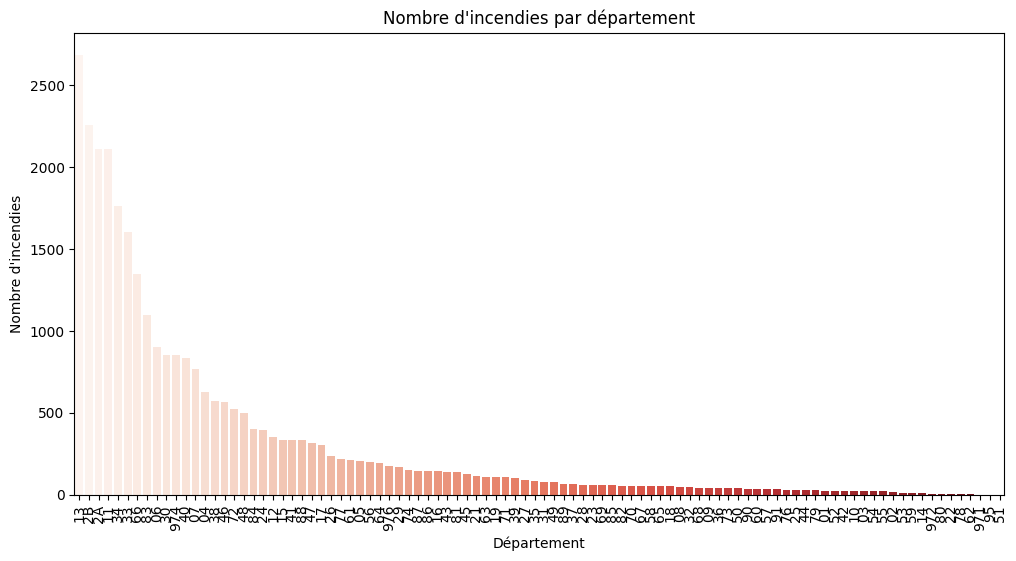

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x=incendies_par_dept.index, y=incendies_par_dept.values, hue=incendies_par_dept.index, palette="Reds", legend=False)
plt.title("Nombre d'incendies par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'incendies")
plt.xticks(rotation=90)
plt.show()

In [64]:
incendies_par_mois = df.groupby('Mois').size()

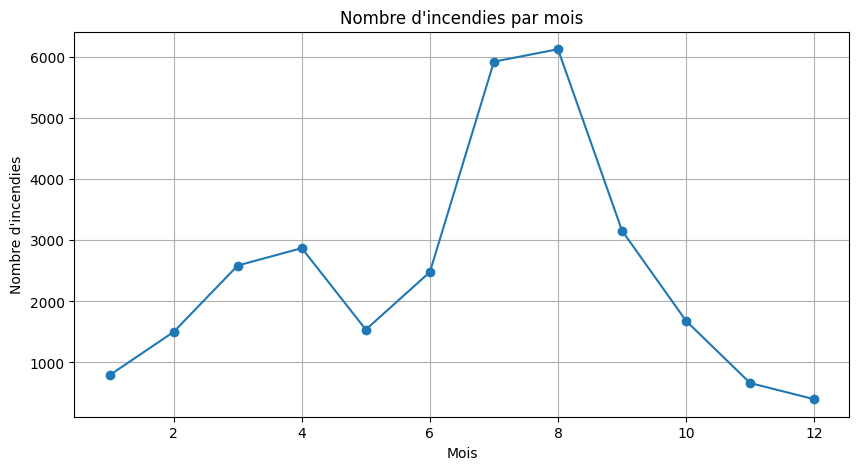

In [65]:
plt.figure(figsize=(10,5))
incendies_par_mois.plot(kind='line', marker='o')
plt.title("Nombre d'incendies par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'incendies")
plt.grid(True)
plt.show()

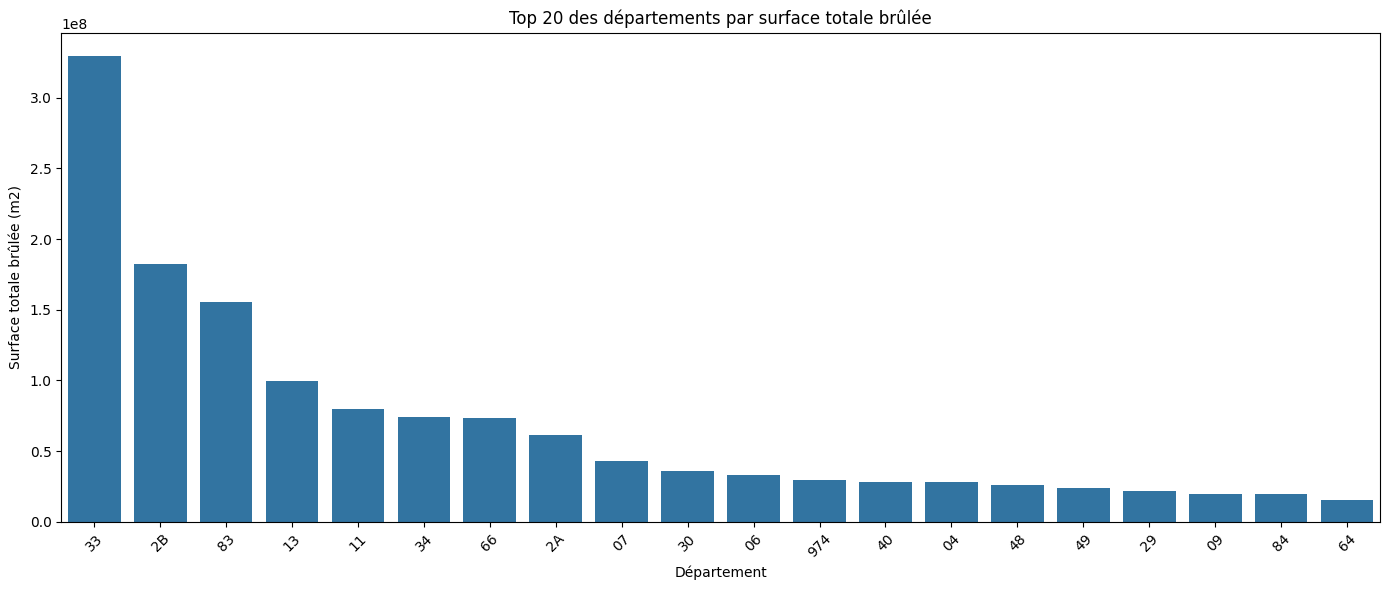

In [66]:
# Plot: Surface totale brûlée par département (Top 20)
df_grouped = df.groupby('Département')['Surface parcourue (m2)'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_grouped, x='Département', y='Surface parcourue (m2)')
plt.title('Top 20 des départements par surface totale brûlée')
plt.xlabel('Département')
plt.ylabel('Surface totale brûlée (m2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

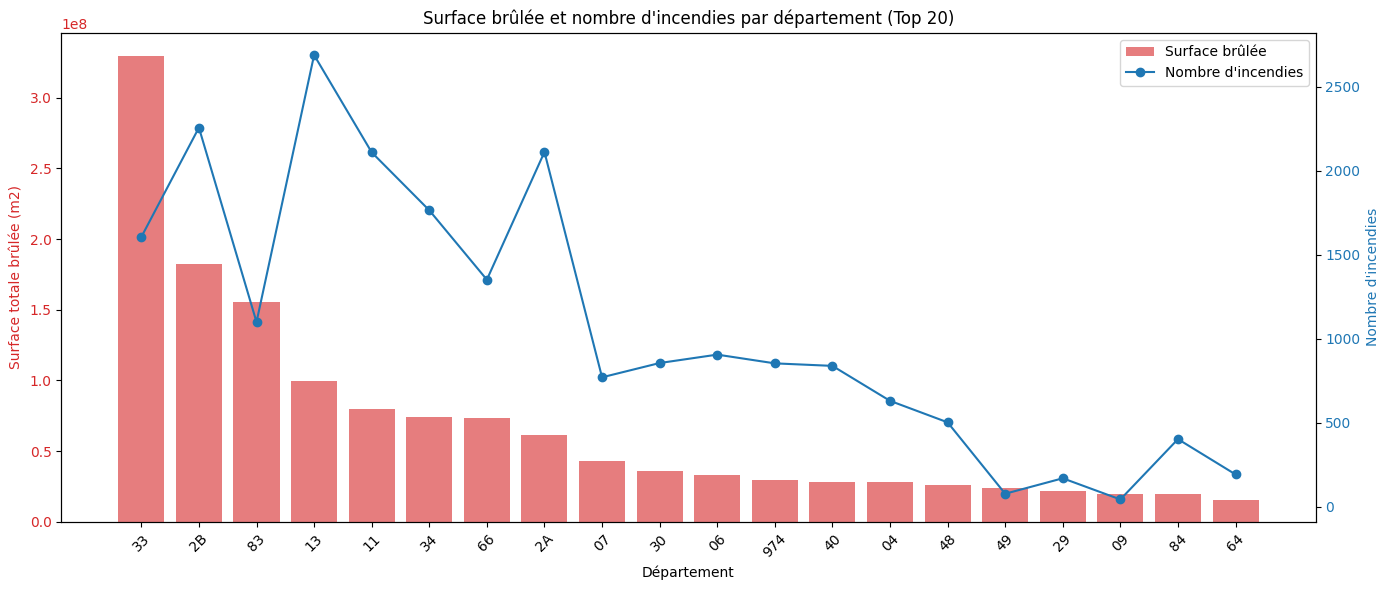

In [67]:
# Grouper les données par département
df_grouped = df.groupby('Département').agg({'Surface parcourue (m2)': 'sum', 'Numéro': 'count'}).reset_index()
df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False).head(20)

# Créer le graphique
fig, ax1 = plt.subplots(figsize=(14, 6))

# Tracer la surface brûlée
color = 'tab:red'
ax1.set_xlabel('Département')
ax1.set_ylabel('Surface totale brûlée (m2)', color=color)
ax1.bar(df_grouped['Département'], df_grouped['Surface parcourue (m2)'], color=color, alpha=0.6, label='Surface brûlée')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Ajouter un deuxième axe y pour le nombre d'incendies
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Nombre d\'incendies', color=color)
ax2.plot(df_grouped['Département'], df_grouped['Numéro'], color=color, marker='o', label='Nombre d\'incendies')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter un titre et une légende
plt.title('Surface brûlée et nombre d\'incendies par département (Top 20)')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

C:\Users\Antoine Dupont\AppData\Local\Temp\ipykernel_20596\3776884239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')


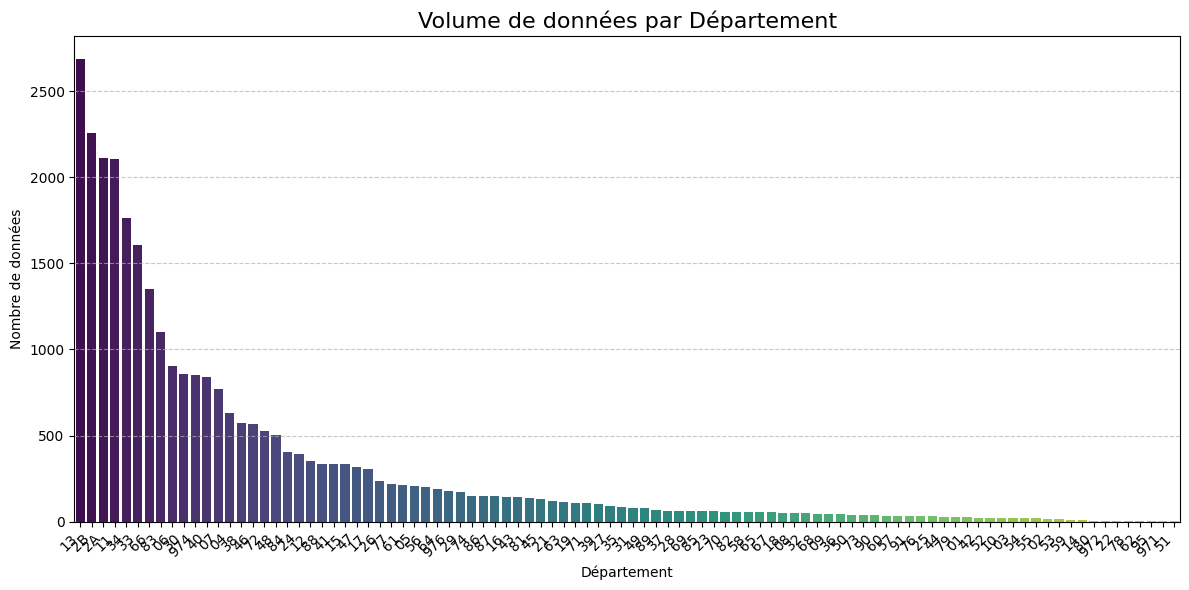

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les occurrences par département
dept_counts = df['Département'].value_counts().sort_values(ascending=False)

# Créer un graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')

plt.title('Volume de données par Département', fontsize=16)
plt.xlabel('Département')
plt.ylabel('Nombre de données')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


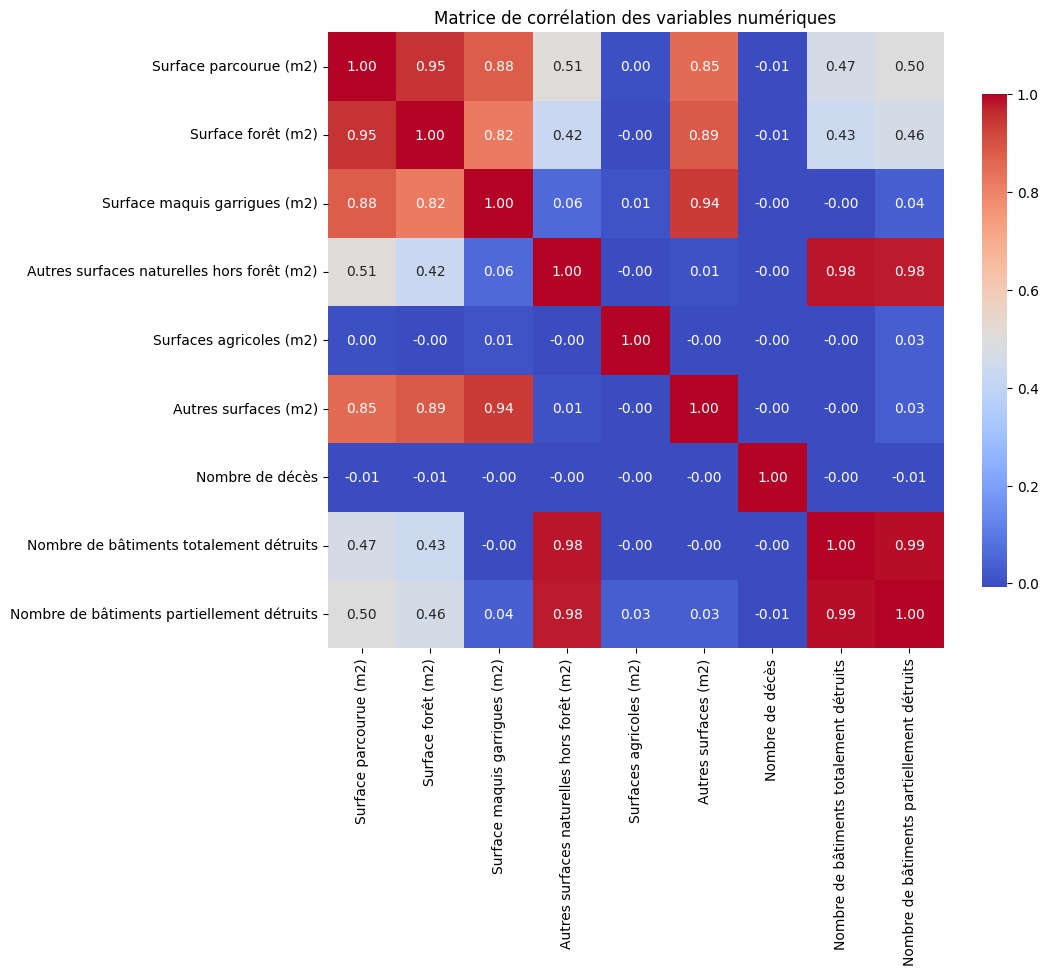

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques d’intérêt
cols_num = [
    'Surface parcourue (m2)',
    'Surface forêt (m2)',
    'Surface maquis garrigues (m2)',
    'Autres surfaces naturelles hors forêt (m2)',
    'Surfaces agricoles (m2)',
    'Autres surfaces (m2)',
    'Nombre de décès',
    'Nombre de bâtiments totalement détruits',
    'Nombre de bâtiments partiellement détruits'
]

# Créer un sous-dataframe avec les colonnes sélectionnées et drop NaN pour la corrélation
df_corr = df[cols_num].copy().dropna()

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation des variables numériques")
plt.show()
